![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Visualize and Standardize the data

6. Model Building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [ ]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.3.0


## 2. Setting Options

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

Let us now, load the image files that is available in two separate folders

In [ ]:
import cv2
nophone = os.listdir('/content/drive/My Drive/Daily task/Case study/Classify Phone/training/cellphone-NO')
yesphone = os.listdir('/content/drive/My Drive/Daily task/Case study/Classify Phone/training/cellphone-YES')

In [ ]:
yesphone[1]

'img130.png'

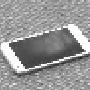

In [ ]:
from google.colab.patches import cv2_imshow
path = '/content/drive/My Drive/Daily task/Case study/Classify Phone/training'
img = cv2.imread(path + '/cellphone-YES/img130.png')
cv2_imshow(img)

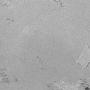

In [ ]:
path1 = '/content/drive/My Drive/Daily task/Case study/Classify Phone/training'
img = cv2.imread(path1 + '/cellphone-NO/img109.png')
cv2_imshow(img)

### Checking frequncy distribution of two classes

In [ ]:
print("The number of images having a mobile phone in it is", len(yesphone))
print("The number of images not having a mobile phone in it is", len(nophone))
print("Total number of training samples are", len(yesphone)+len(nophone))

The number of images having a mobile phone in it is 124
The number of images not having a mobile phone in it is 121
Total number of training samples are 245


#### Class is quite balanced but total number of samples is quite less

## 4. Data Analysis and Preparation

### Read image files and create label data

In [ ]:
# Reding images from 'YES" folder and creating a list of label = 1
yesimg = []
y_yes = []

os.chdir('/content/drive/My Drive/Daily task/Case study/Classify Phone/training/cellphone-YES')
import cv2
for i in os.listdir(path + '/cellphone-YES'):
  a = cv2.imread(i)
  a = cv2.resize(a,(128,128))
  yesimg.append(a)
  y_yes.append(1)

In [ ]:
#Checking size and shape of the images
print(yesimg[1].shape)
print(len(yesimg))

(128, 128, 3)
124


In [ ]:
# Reding images from 'NO" folder and creating a list of label = 0 
noimg = []
y_no = []
os.chdir('/content/drive/My Drive/Daily task/Case study/Classify Phone/training/cellphone-NO')
import cv2
for i in os.listdir(path + '/cellphone-NO'):
  a = cv2.imread(i)
  a = cv2.resize(a,(128,128))
  noimg.append(a)
  y_no.append(0)

In [ ]:
print(noimg[0].shape)
print(len(noimg))

(128, 128, 3)
121


In [ ]:
#Concatenating both the categories of images into one array
X_img = np.concatenate((yesimg, noimg), axis=0)

In [ ]:
#Checking shape and size of the final data
print(X_img[0].shape)
print(len(X_img))

(128, 128, 3)
245


In [ ]:
#Concatenating the label data into one array
Y = np.concatenate((y_yes,y_no), axis = 0)

In [ ]:
print(len(Y))

245


In [ ]:
#Randomizing the data
from sklearn.utils import shuffle
data, label = shuffle(X_img, Y, random_state=2)

In [ ]:
#Splitting the data into train and test set using default size
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(data,label,random_state=4)

### Analyzing label data

In [ ]:
labels = pd.read_csv('/content/drive/My Drive/Daily task/Case study/Classify Phone/mobile-images - data.csv')

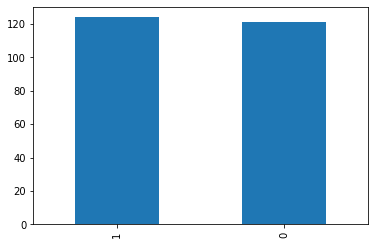

In [ ]:
pd.value_counts(labels['label']).plot(kind='bar')

In [ ]:
labels.head(5)

,filename,label
0,img56.png,No
1,img199.png,Yes
2,img107.png,No
3,img123.png,Yes
4,img193.png,Yes


In [ ]:
labels['label'] = pd.get_dummies(labels['label'])

In [ ]:
labels.head(5)

,filename,label
0,img56.png,0
1,img199.png,1
2,img107.png,0
3,img123.png,1
4,img193.png,1


## 5. Visualize and Standardize the data

Let us try visualising the first 10 images in the dataset.

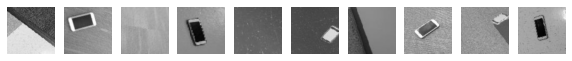

label for each of the above image: [0 1 0 1 0 1 0 1 1 1]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

Let us check the shape of the data

In [ ]:
X_train.shape

(183, 128, 128, 3)

In [ ]:
y_train.shape

(183,)

Need to reshape the X_train and X_test so that the same can be fed for model building. We need to feed a 3D tensor into the model.

- We will normalize the data. We divide by 255 as this is a grayscale image and can take values from 0-255


In [ ]:
x_train = X_train.reshape(X_train.shape[0],128,128,3)
x_test = X_test.reshape(X_test.shape[0],128,128,3)

In [ ]:
# # normalize inputs from 0-255 to 0-1

X_train_std = x_train / 255.0
X_test_std = x_test / 255.0

print('Resized Training set', X_train_std.shape, y_train.shape)
print('Resized Test set', X_test_std.shape, y_test.shape)

Resized Training set (183, 128, 128, 3) (183,)
Resized Test set (62, 128, 128, 3) (62,)


Encoding the target variables. We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [ ]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 2


## 6. Model building

#### Let us now build the neural network model, fit the training data, test it and provide model summary. Feel free to play around with the network and get to a better solution.

In [ ]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

nb_epoch = 30
rows, cols = 128, 128
n_channels = 3
batch_size = 32
n_classes = 2
n_filter = 32
n_pool = 2
n_conv = 3

def cnn_model():
    # create model
    model = Sequential()  
    model.add(Conv2D(n_filter,(n_conv,n_conv), activation= 'relu', input_shape=(rows,cols,n_channels)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    return model

Let us create an object of our model

In [ ]:
# build the model
model = cnn_model()

In [ ]:
# Compile model
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) ### Loss function = Categorical cross entropy

Let us fit our model on the training dataset along with it's equivalent one hot encoded labels

In [ ]:
# Fit the model
training_history = model.fit(X_train_std, y_train, validation_data=(X_test_std, y_test), epochs=nb_epoch, batch_size=batch_size, verbose=2)

Epoch 1/30
6/6 - 1s - loss: 1.4012 - accuracy: 0.5082 - val_loss: 0.7122 - val_accuracy: 0.4194
Epoch 2/30
6/6 - 0s - loss: 0.6292 - accuracy: 0.5628 - val_loss: 0.6193 - val_accuracy: 0.6452
Epoch 3/30
6/6 - 0s - loss: 0.5150 - accuracy: 0.7869 - val_loss: 0.4316 - val_accuracy: 0.8710
Epoch 4/30
6/6 - 0s - loss: 0.3557 - accuracy: 0.8798 - val_loss: 0.3819 - val_accuracy: 0.8548
Epoch 5/30
6/6 - 0s - loss: 0.2742 - accuracy: 0.8743 - val_loss: 0.2940 - val_accuracy: 0.9032
Epoch 6/30
6/6 - 0s - loss: 0.2641 - accuracy: 0.9071 - val_loss: 0.2927 - val_accuracy: 0.8710
Epoch 7/30
6/6 - 0s - loss: 0.2190 - accuracy: 0.9180 - val_loss: 0.3063 - val_accuracy: 0.8548
Epoch 8/30
6/6 - 0s - loss: 0.1913 - accuracy: 0.9344 - val_loss: 0.2770 - val_accuracy: 0.9032
Epoch 9/30
6/6 - 0s - loss: 0.1394 - accuracy: 0.9454 - val_loss: 0.3093 - val_accuracy: 0.8871
Epoch 10/30
6/6 - 0s - loss: 0.1141 - accuracy: 0.9672 - val_loss: 0.2553 - val_accuracy: 0.9194
Epoch 11/30
6/6 - 0s - loss: 0.0817 - a

# 7. Conclusion and Interpretation


In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test_std, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.4406394064426422
Accuracy: 0.9032257795333862


Text(0.5, 1.0, 'Training and validation loss')

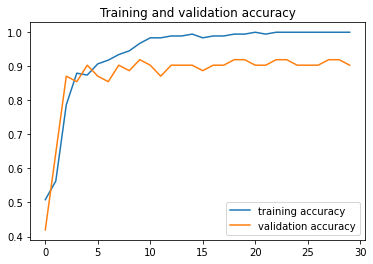

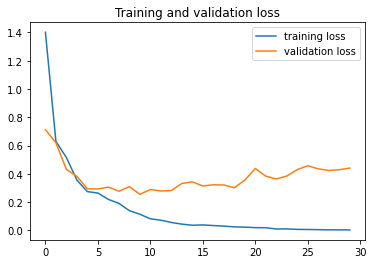

In [ ]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

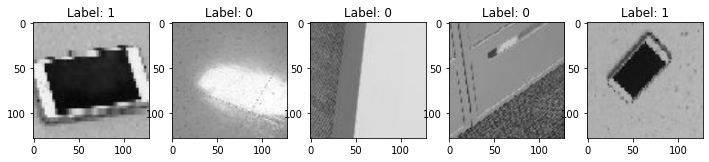

In [218]:
sample = model.predict_classes(X_test_std)

test_pred = X_test_std
def show_pred(show, test_pred, sample):
    fig, axs = plt.subplots(1, show, figsize=(12, 8))
    for i in range(0, show):
        axs[i].imshow(test_pred[i], label=sample[i])
        axs[i].set_title('Label: {}'.format(sample[i]))
        
show_pred(5, test_pred, sample)

There are two classes in the dataset which represent the images with mobile and without mobile.

We trained a Convolutional Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of ~90 %. 

Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.

Thus, with this amount of accuracy we are able to distinguish between the different digits in this dataset.


## Further explore

Can you try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the one in this notebook? 